In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from PIL import UnidentifiedImageError
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score, precision_score, recall_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3, DenseNet121, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet

In [8]:
from sklearn.metrics import accuracy_score

In [3]:
# Base directory for your datasets
base_dir = '/content/drive/My Drive/victim detection 4 classes'
# base_dir =
datasets = ['train', 'valid', 'test']
img_size = (224, 224)

resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
resnet_model.trainable = False
vgg_model = VGG19(weights='imagenet', include_top=False, pooling='avg')
vgg_model.trainable = False
inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
inception_model.trainable = False
densenet_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')
densenet_model.trainable = False
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
efficientnet_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [4]:
def load_and_preprocess_image(img_path, img_size, preprocess_func):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)
    return img, img_array

def extract_features(data_dir, dataset, model, preprocess_func, img_size, model_name):
    data = []
    labels =    
    target_classes = ['utuh', 'kaki', 'kepala', 'tangan']  # Define target classes
    for i, img_name in enumerate(os.listdir(os.path.join(data_dir, dataset))):
        img_path = os.path.join(data_dir, dataset, img_name)
        # Extract class label from the filename
        class_label = img_name.split('-')[0]
        if class_label in target_classes:  # Check if class is in target classes
            try:
                img, img_array = load_and_preprocess_image(img_path, img_size, preprocess_func)

                # Print a sample image
                if i == 0:  # Print the first image
                    print(f"Sample image from {dataset}/{class_label}:")
                    plt.imshow(image.array_to_img(img_array[0]))
                    plt.axis('off')
                    plt.show()

                features = model.predict(img_array)
                features = features.flatten()
                data.append(features)
                labels.append(class_label)
            except UnidentifiedImageError:
                print(f"Skipping file {img_name}: not a valid image.")

    df = pd.DataFrame(data)
    df['label'] = labels
    df.to_csv(f'{dataset}_features_{model_name}.csv', index=False)

Extracting features using resnet model...
1/1 [==============================] - 0s 37ms/step
Sample image from valid/tangan:


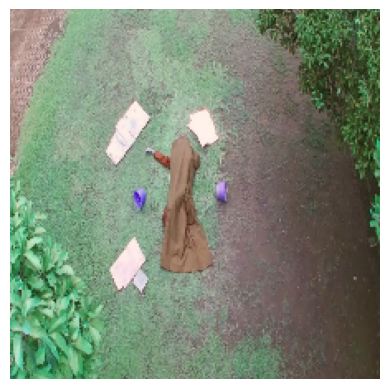

1/1 [==============================] - 0s 30ms/step
Sample image from test/tangan:


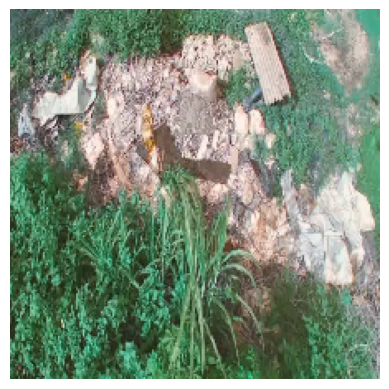

1/1 [==============================] - 0s 35ms/step
Extracting features using vgg model...
1/1 [==============================] - 0s 30ms/step
Sample image from valid/tangan:


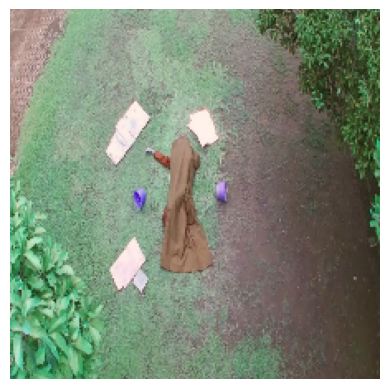

1/1 [==============================] - 0s 19ms/step
Sample image from test/tangan:


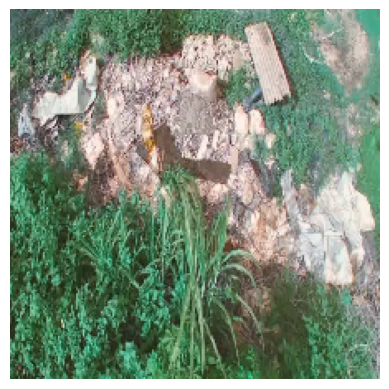

1/1 [==============================] - 0s 21ms/step
Extracting features using inception model...
1/1 [==============================] - 0s 32ms/step
Sample image from valid/tangan:


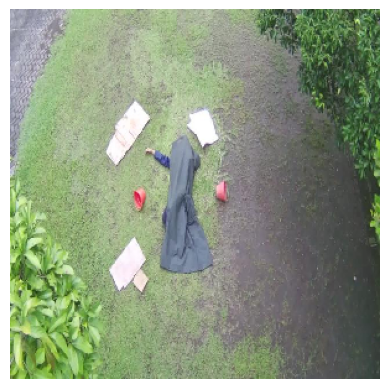

1/1 [==============================] - 0s 25ms/step
Sample image from test/tangan:


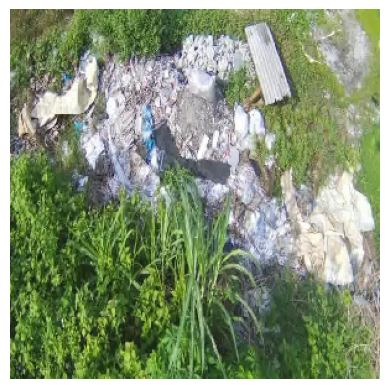

1/1 [==============================] - 0s 29ms/step
Extracting features using densenet model...
1/1 [==============================] - 0s 27ms/step
Sample image from valid/tangan:


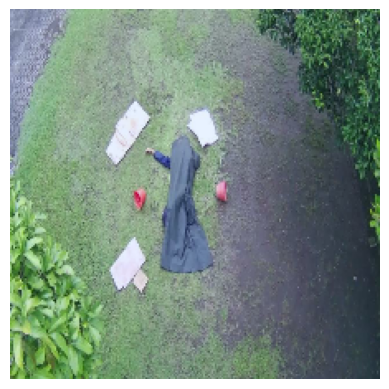

1/1 [==============================] - 0s 26ms/step
Sample image from test/tangan:


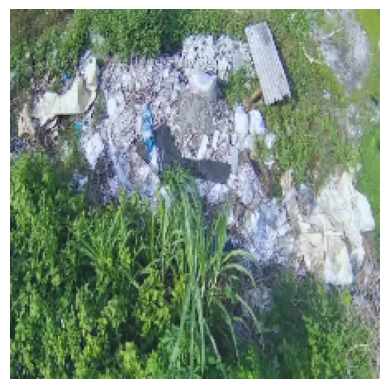

1/1 [==============================] - 0s 34ms/step
Extracting features using efficientnet model...
1/1 [==============================] - 0s 39ms/step
Sample image from valid/tangan:


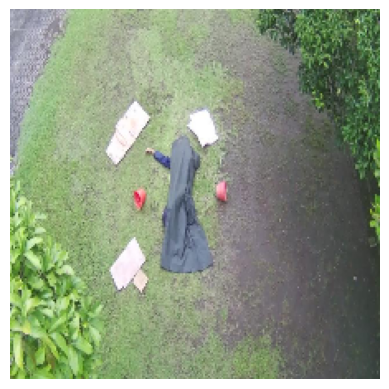

1/1 [==============================] - 0s 64ms/step
Sample image from test/tangan:


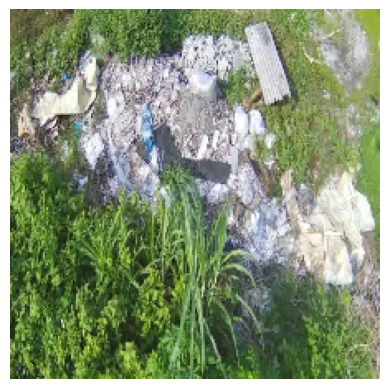

1/1 [==============================] - 0s 39ms/step


In [7]:
base_dir = '/content/drive/My Drive/victim detection 4 classes'
datasets = ['train', 'valid', 'test']
img_size = (224, 224)

models = {
    'resnet': (ResNet50(weights='imagenet', include_top=False, pooling='avg'), preprocess_resnet, img_size),
    'vgg': (VGG19(weights='imagenet', include_top=False, pooling='avg'), preprocess_vgg, img_size),
    'inception': (InceptionV3(weights='imagenet', include_top=False, pooling='avg'), preprocess_inception, (299, 299)),
    'densenet': (DenseNet121(weights='imagenet', include_top=False, pooling='avg'), preprocess_densenet, img_size),
    'efficientnet': (EfficientNetB0(weights='imagenet', include_top=False, pooling='avg'), preprocess_efficientnet,
                     img_size)
}

# Extract features for each dataset using each model
for model_name, (model, preprocess_func, img_size) in models.items():
    print(f"Extracting features using {model_name} model...")
    for dataset in datasets:
        extract_features(base_dir, dataset, model, preprocess_func, img_size, model_name)


In [10]:
# Load extracted features
train_df_resnet = pd.read_csv('train_features_resnet.csv')
validation_df_resnet = pd.read_csv('valid_features_resnet.csv')
test_df_resnet = pd.read_csv('test_features_resnet.csv')

# Separate features and labels
X_train_resnet = train_df_resnet.drop('label', axis=1)
y_train_resnet = train_df_resnet['label']
X_validation_resnet = validation_df_resnet.drop('label', axis=1)
y_validation_resnet = validation_df_resnet['label']
X_test_resnet = test_df_resnet.drop('label', axis=1)
y_test_resnet = test_df_resnet['label']

In [11]:
# Load extracted features
train_df_vgg = pd.read_csv('train_features_vgg.csv')
validation_df_vgg = pd.read_csv('valid_features_vgg.csv')
test_df_vgg = pd.read_csv('test_features_vgg.csv')

# Separate features and labels
X_train_vgg = train_df_vgg.drop('label', axis=1)
y_train_vgg = train_df_vgg['label']
X_validation_vgg = validation_df_vgg.drop('label', axis=1)
y_validation_vgg = validation_df_vgg['label']
X_test_vgg = test_df_vgg.drop('label', axis=1)
y_test_vgg = test_df_vgg['label']

In [12]:
# Load extracted features
train_df_inception = pd.read_csv('train_features_inception.csv')
validation_df_inception = pd.read_csv('valid_features_inception.csv')
test_df_inception = pd.read_csv('test_features_inception.csv')

# Separate features and labels
X_train_inception = train_df_inception.drop('label', axis=1)
y_train_inception = train_df_inception['label']
X_validation_inception = validation_df_inception.drop('label', axis=1)
y_validation_inception = validation_df_inception['label']
X_test_inception = test_df_inception.drop('label', axis=1)
y_test_inception = test_df_inception['label']

In [13]:
# Load extracted features
train_df_densenet = pd.read_csv('train_features_densenet.csv')
validation_df_densenet = pd.read_csv('valid_features_densenet.csv')
test_df_densenet = pd.read_csv('test_features_densenet.csv')

# Separate features and labels
X_train_densenet = train_df_densenet.drop('label', axis=1)
y_train_densenet = train_df_densenet['label']
X_validation_densenet = validation_df_densenet.drop('label', axis=1)
y_validation_densenet = validation_df_densenet['label']
X_test_densenet = test_df_densenet.drop('label', axis=1)
y_test_densenet = test_df_densenet['label']

In [14]:
# Load extracted features
train_df_efficientnet = pd.read_csv('train_features_efficientnet.csv')
validation_df_efficientnet = pd.read_csv('valid_features_efficientnet.csv')
test_df_efficientnet = pd.read_csv('test_features_efficientnet.csv')

# Separate features and labels
X_train_efficientnet = train_df_efficientnet.drop('label', axis=1)
y_train_efficientnet = train_df_efficientnet['label']
X_validation_efficientnet = validation_df_efficientnet.drop('label', axis=1)
y_validation_efficientnet = validation_df_efficientnet['label']
X_test_efficientnet = test_df_efficientnet.drop('label', axis=1)
y_test_efficientnet = test_df_efficientnet['label']

In [21]:
from time import time

In [22]:
# Initialize the RandomForestClassifier
rf_classifier_resnet = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
start_time = time()
rf_classifier_resnet.fit(X_train_resnet, y_train_resnet)
end_time = time()
training_time_resnet = end_time - start_time

# Initialize the RandomForestClassifier
rf_classifier_vgg = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
start_time = time()
rf_classifier_vgg.fit(X_train_vgg, y_train_vgg)
end_time = time()
training_time_vgg = end_time - start_time


# Initialize the RandomForestClassifier
rf_classifier_inception = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
start_time = time()
rf_classifier_inception.fit(X_train_inception, y_train_inception)
end_time = time()
training_time_inception = end_time - start_time

# Initialize the RandomForestClassifier
rf_classifier_efficientnet = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
start_time = time()
rf_classifier_efficientnet.fit(X_train_efficientnet, y_train_efficientnet)
end_time = time()
training_time_efficientnet = end_time - start_time

# Initialize the RandomForestClassifier
rf_classifier_densenet = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
start_time = time()
rf_classifier_densenet.fit(X_train_densenet, y_train_densenet)
end_time = time()
training_time_densenet = end_time - start_time


In [16]:
# Predict on the validation data
y_val_pred_resnet = rf_classifier_resnet.predict(X_validation_resnet)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_validation_resnet, y_val_pred_resnet))
print("Validation Classification Report:")
print(classification_report(y_validation_resnet, y_val_pred_resnet))

# Predict on the test data
y_test_pred_resnet = rf_classifier_resnet.predict(X_test_resnet)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test_resnet, y_test_pred_resnet))
print("Test Classification Report:")
print(classification_report(y_test_resnet, y_test_pred_resnet))


Validation Accuracy: 0.9653846153846154
Validation Classification Report:
              precision    recall  f1-score   support

        kaki       0.95      1.00      0.97        74
      kepala       0.97      0.94      0.96        70
      tangan       0.95      0.93      0.94        61
        utuh       1.00      0.98      0.99        55

    accuracy                           0.97       260
   macro avg       0.97      0.96      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Accuracy: 0.96
Test Classification Report:
              precision    recall  f1-score   support

        kaki       1.00      0.96      0.98        27
      kepala       0.97      0.88      0.92        32
      tangan       0.88      1.00      0.94        29
        utuh       1.00      1.00      1.00        37

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125



In [17]:
# Predict on the validation data
y_val_pred_inception = rf_classifier_inception.predict(X_validation_inception)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_validation_inception, y_val_pred_inception))
print("Validation Classification Report:")
print(classification_report(y_validation_inception, y_val_pred_inception))

# Predict on the test data
y_test_pred_inception = rf_classifier_inception.predict(X_test_inception)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test_inception, y_test_pred_inception))
print("Test Classification Report:")
print(classification_report(y_test_inception, y_test_pred_inception))

Validation Accuracy: 0.95
Validation Classification Report:
              precision    recall  f1-score   support

        kaki       0.90      0.99      0.94        74
      kepala       0.96      0.96      0.96        70
      tangan       0.97      0.93      0.95        61
        utuh       1.00      0.91      0.95        55

    accuracy                           0.95       260
   macro avg       0.96      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260

Test Accuracy: 0.976
Test Classification Report:
              precision    recall  f1-score   support

        kaki       0.96      1.00      0.98        27
      kepala       1.00      0.97      0.98        32
      tangan       0.94      1.00      0.97        29
        utuh       1.00      0.95      0.97        37

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [18]:
# Predict on the validation data
y_val_pred_vgg = rf_classifier_vgg.predict(X_validation_vgg)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_validation_vgg, y_val_pred_vgg))
print("Validation Classification Report:")
print(classification_report(y_validation_vgg, y_val_pred_vgg))

# Predict on the test data
y_test_pred_vgg = rf_classifier_vgg.predict(X_test_vgg)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test_vgg, y_test_pred_vgg))
print("Test Classification Report:")
print(classification_report(y_test_vgg, y_test_pred_vgg))

Validation Accuracy: 0.9730769230769231
Validation Classification Report:
              precision    recall  f1-score   support

        kaki       0.94      1.00      0.97        74
      kepala       0.97      0.99      0.98        70
      tangan       1.00      0.97      0.98        61
        utuh       1.00      0.93      0.96        55

    accuracy                           0.97       260
   macro avg       0.98      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Accuracy: 0.984
Test Classification Report:
              precision    recall  f1-score   support

        kaki       0.96      1.00      0.98        27
      kepala       1.00      0.97      0.98        32
      tangan       0.97      1.00      0.98        29
        utuh       1.00      0.97      0.99        37

    accuracy                           0.98       125
   macro avg       0.98      0.99      0.98       125
weighted avg       0.98      0.98      0.98       125



In [19]:
# Predict on the validation data
y_val_pred_densenet = rf_classifier_densenet.predict(X_validation_densenet)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_validation_densenet, y_val_pred_densenet))
print("Validation Classification Report:")
print(classification_report(y_validation_densenet, y_val_pred_densenet))

# Predict on the test data
y_test_pred_densenet = rf_classifier_densenet.predict(X_test_densenet)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test_densenet, y_test_pred_densenet))
print("Test Classification Report:")
print(classification_report(y_test_densenet, y_test_pred_densenet))

Validation Accuracy: 0.9576923076923077
Validation Classification Report:
              precision    recall  f1-score   support

        kaki       0.91      1.00      0.95        74
      kepala       0.97      0.94      0.96        70
      tangan       0.97      0.95      0.96        61
        utuh       1.00      0.93      0.96        55

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Test Accuracy: 0.976
Test Classification Report:
              precision    recall  f1-score   support

        kaki       0.96      1.00      0.98        27
      kepala       0.94      1.00      0.97        32
      tangan       1.00      0.93      0.96        29
        utuh       1.00      0.97      0.99        37

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [20]:
# Predict on the validation data
y_val_pred_efficientnet = rf_classifier_efficientnet.predict(X_validation_efficientnet)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_validation_efficientnet, y_val_pred_efficientnet))
print("Validation Classification Report:")
print(classification_report(y_validation_efficientnet, y_val_pred_efficientnet))

# Predict on the test data
y_test_pred_efficientnet = rf_classifier_efficientnet.predict(X_test_efficientnet)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test_efficientnet, y_test_pred_efficientnet))
print("Test Classification Report:")
print(classification_report(y_test_efficientnet, y_test_pred_efficientnet))

Validation Accuracy: 0.9615384615384616
Validation Classification Report:
              precision    recall  f1-score   support

        kaki       0.95      0.97      0.96        74
      kepala       0.97      0.96      0.96        70
      tangan       0.97      0.97      0.97        61
        utuh       0.96      0.95      0.95        55

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Test Accuracy: 0.984
Test Classification Report:
              precision    recall  f1-score   support

        kaki       0.93      1.00      0.96        27
      kepala       1.00      1.00      1.00        32
      tangan       1.00      1.00      1.00        29
        utuh       1.00      0.95      0.97        37

    accuracy                           0.98       125
   macro avg       0.98      0.99      0.98       125
weighted avg       0.99      0.98      0.98       125



In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize

In [ ]:
# Helper function to calculate Intersection over Union (IoU)
def calculate_iou(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    intersection = np.diag(cm)
    ground_truth_set = cm.sum(axis=1)
    predicted_set = cm.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    iou = intersection / union.astype(np.float32)
    return np.mean(iou)

# Helper function to calculate AUC
def calculate_auc(y_true, y_pred):
    y_true_bin = label_binarize(y_true, classes=['utuh', 'kaki', 'kepala', 'tangan'])
    y_pred_bin = label_binarize(y_pred, classes=['utuh', 'kaki', 'kepala', 'tangan'])
    return roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')

# Predict on the validation data
y_val_pred = rf_classifier.predict(X_validation)

# Predict on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'IoU': calculate_iou,
    'AUC': calculate_auc
}

# Validation Metrics
print("Validation Metrics:")
for metric_name, metric_func in metrics.items():
    print(f"{metric_name}: {metric_func(y_validation, y_val_pred):.4f}")

# Test Metrics
print("\nTest Metrics:")
for metric_name, metric_func in metrics.items():
    print(f"{metric_name}: {metric_func(y_test, y_test_pred):.4f}")

# Print classification report for detailed class-wise metrics
print("\nValidation Classification Report:")
print(classification_report(y_validation, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# FPS (Frames Per Second)

fps = len(X_test) / training_time

print(f"\nTraining Time: {training_time:.4f} seconds")
print(f"Frames Per Second (FPS): {fps:.2f}")


In [25]:
# Helper function to calculate Intersection over Union (IoU)
def calculate_iou(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    intersection = np.diag(cm)
    ground_truth_set = cm.sum(axis=1)
    predicted_set = cm.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    iou = intersection / union.astype(np.float32)
    return np.mean(iou)

# Helper function to calculate AUC
def calculate_auc(y_true, y_pred):
    y_true_bin = label_binarize(y_true, classes=['utuh', 'kaki', 'kepala', 'tangan'])
    y_pred_bin = label_binarize(y_pred, classes=['utuh', 'kaki', 'kepala', 'tangan'])
    return roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    'IoU': calculate_iou,
    'AUC': calculate_auc
}

# List to store results
results = {}

for model_name in models.keys():
    # Load extracted features
    train_df = pd.read_csv(f'train_features_{model_name}.csv')
    validation_df = pd.read_csv(f'valid_features_{model_name}.csv')
    test_df = pd.read_csv(f'test_features_{model_name}.csv')

    # Separate features and labels
    X_train = train_df.drop('label', axis=1)
    y_train = train_df['label']
    X_validation = validation_df.drop('label', axis=1)
    y_validation = validation_df['label']
    X_test = test_df.drop('label', axis=1)
    y_test = test_df['label']

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model on the training data
    start_time = time()
    rf_classifier.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time

    # Predict on the validation data
    y_val_pred = rf_classifier.predict(X_validation)

    # Predict on the test data
    y_test_pred = rf_classifier.predict(X_test)

    # Evaluate the model on validation data
    print(f"\nValidation Metrics for {model_name.capitalize()}:")
    val_metrics = {}
    for metric_name, metric_func in metrics.items():
        val_metrics[metric_name] = metric_func(y_validation, y_val_pred)
        print(f"{metric_name}: {val_metrics[metric_name]:.4f}")

    # Evaluate the model on test data
    print(f"\nTest Metrics for {model_name.capitalize()}:")
    test_metrics = {}
    for metric_name, metric_func in metrics.items():
        test_metrics[metric_name] = metric_func(y_test, y_test_pred)
        print(f"{metric_name}: {test_metrics[metric_name]:.4f}")

    # Print classification report for detailed class-wise metrics
    print(f"\nValidation Classification Report for {model_name.capitalize()}:")
    print(classification_report(y_validation, y_val_pred))

    print(f"\nTest Classification Report for {model_name.capitalize()}:")
    print(classification_report(y_test, y_test_pred))

    # FPS (Frames Per Second)
    fps = len(X_test) / training_time
    print(f"\nTraining Time for {model_name.capitalize()}: {training_time:.4f} seconds")
    print(f"Frames Per Second (FPS) for {model_name.capitalize()}: {fps:.2f}")

    # Store results
    results[model_name] = {
        'validation_metrics': val_metrics,
        'test_metrics': test_metrics,
        'fps': fps,
        'training_time': training_time
    }



Validation Metrics for Resnet:
Accuracy: 0.9654
Precision: 0.9673
Recall: 0.9648
F1 Score: 0.9658
IoU: 0.9345
AUC: 0.9765

Test Metrics for Resnet:
Accuracy: 0.9600
Precision: 0.9611
Recall: 0.9595
F1 Score: 0.9587
IoU: 0.9226
AUC: 0.9732

Validation Classification Report for Resnet:
              precision    recall  f1-score   support

        kaki       0.95      1.00      0.97        74
      kepala       0.97      0.94      0.96        70
      tangan       0.95      0.93      0.94        61
        utuh       1.00      0.98      0.99        55

    accuracy                           0.97       260
   macro avg       0.97      0.96      0.97       260
weighted avg       0.97      0.97      0.97       260


Test Classification Report for Resnet:
              precision    recall  f1-score   support

        kaki       1.00      0.96      0.98        27
      kepala       0.97      0.88      0.92        32
      tangan       0.88      1.00      0.94        29
        utuh       1.0